# **Clasificación de frutas por su madurez**

## Visión Artificial - Semestre 2024-2

### **Integrantes**


*   Juan José Cañas - jcanast@unal.edu.co - CC 1025883703
*   María Manuela Salamanca Murcia - msalamancamu@unal.edu.co - CC 1084330611
*   Juan David Trejos Gamboa - jtrejosg@unal.edu.co - CC 1091353518

"introducción al proyecto"

objetivos


### **Descripción del dataset**

"introducir una breve descripción del dataset"

https://universe.roboflow.com/roboflow-universe-projects/banana-ripeness-classification/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true

Este dataset consta de 5616 imágenes de 640 x 480 pixeles en canales RGB.

In [14]:
#importamos librerias
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image
from skimage import morphology as morph, measure
import csv
import os

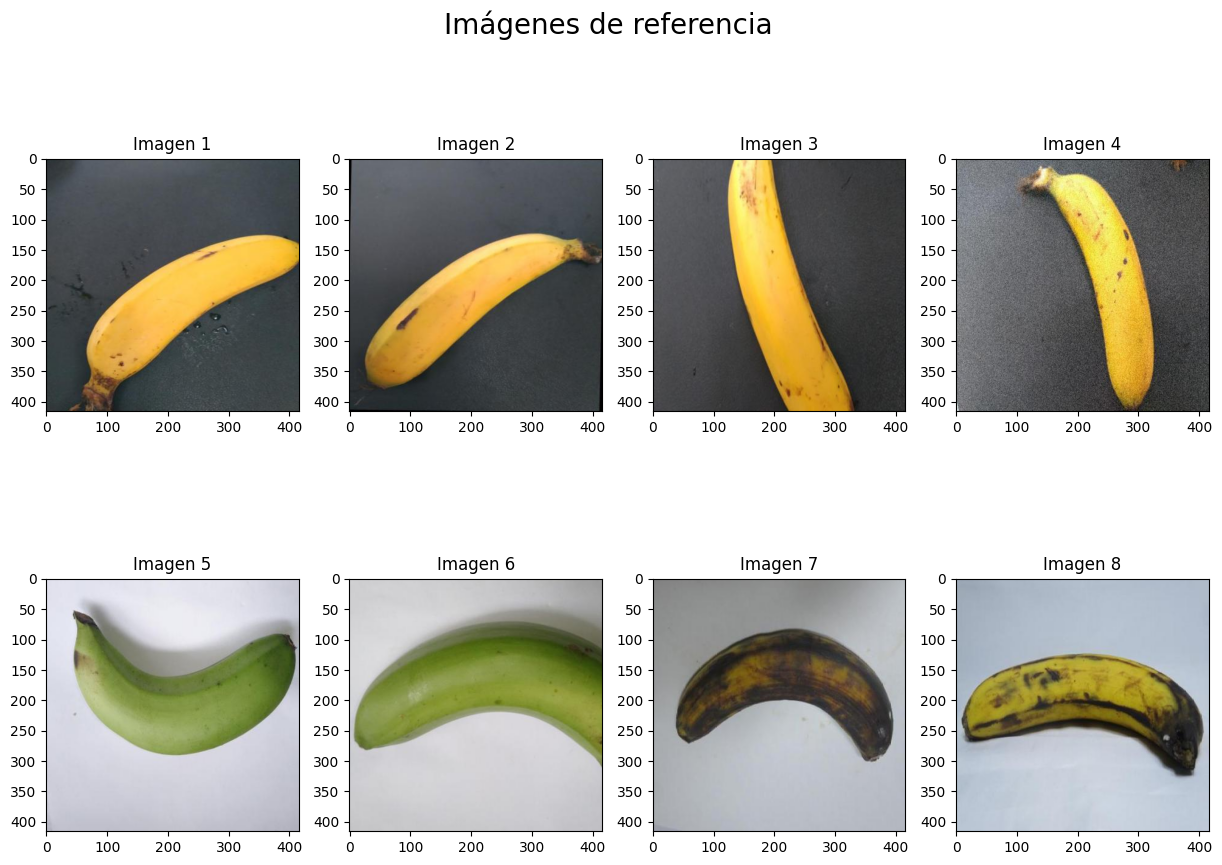

In [15]:
#Se cargaran algunas imágenes del dataset distintas 
# Se deben pasar a RGB para poder visualizarlas correctamente, pues la función cv2.imread 
# Esto se hace con ayuda de la función COLOR_BGR2RGB de OpenCV
img1=cv2.cvtColor(cv2.imread("img/banana-ad7d5ed0-394a.jpg"),cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread("img/banana-c6cef9c7.jpg"),cv2.COLOR_BGR2RGB)
img3=cv2.cvtColor(cv2.imread("img/banana-de7cc774.jpg"),cv2.COLOR_BGR2RGB)
img4=cv2.cvtColor(cv2.imread("img/banana-df37cb83.jpg"),cv2.COLOR_BGR2RGB)
img5=cv2.cvtColor(cv2.imread("img/freshunripe-1e57db85.jpg"),cv2.COLOR_BGR2RGB)
img6=cv2.cvtColor(cv2.imread("img/freshunripe-69ea7cc6.jpg"),cv2.COLOR_BGR2RGB)
img7=cv2.cvtColor(cv2.imread("img/mold-e5d7bf46.jpg"),cv2.COLOR_BGR2RGB)
img8=cv2.cvtColor(cv2.imread("img/mold-e201c6ba.jpg"),cv2.COLOR_BGR2RGB)

#Se crea un arreglo 2 x 4 para mostrar las imágenes
fig1, arreglo_plots = plt.subplots(2,4, figsize=(15, 10))
fig1.suptitle('Imágenes de referencia', fontsize=20)
#Se asigna la imagen que va a ir en cada casilla del arreglo
arreglo_plots[0,0].set_title('Imagen 1')
arreglo_plots[0,0].imshow(img1)
arreglo_plots[0,1].set_title('Imagen 2')
arreglo_plots[0,1].imshow(img2)
arreglo_plots[0,2].set_title('Imagen 3')
arreglo_plots[0,2].imshow(img3)
arreglo_plots[0,3].set_title('Imagen 4')
arreglo_plots[0,3].imshow(img4)
arreglo_plots[1,0].set_title('Imagen 5')
arreglo_plots[1,0].imshow(img5)
arreglo_plots[1,1].set_title('Imagen 6')
arreglo_plots[1,1].imshow(img6)
arreglo_plots[1,2].set_title('Imagen 7')
arreglo_plots[1,2].imshow(img7)
arreglo_plots[1,3].set_title('Imagen 8')
arreglo_plots[1,3].imshow(img8)

**Limitantes y diferencias encontradas**<br>

"Describir las imagenes ¿que diferencias tiene? ¿que se nos podría llegar a complicar?"

## Análisis de Canales de Colores del Dataset

Para empezar el analisis de Canales de color vamos a tomar 4 imagenes cuyas caracteristicas no sean redundantes.

Los bananos los vamos a clasificar en tres clases unripe: inmaduro, ripe: maduro, overripe: muy maduro.

ripe: imagenes 2

unripe: imagen 6

overipe: imagen 7 y 8



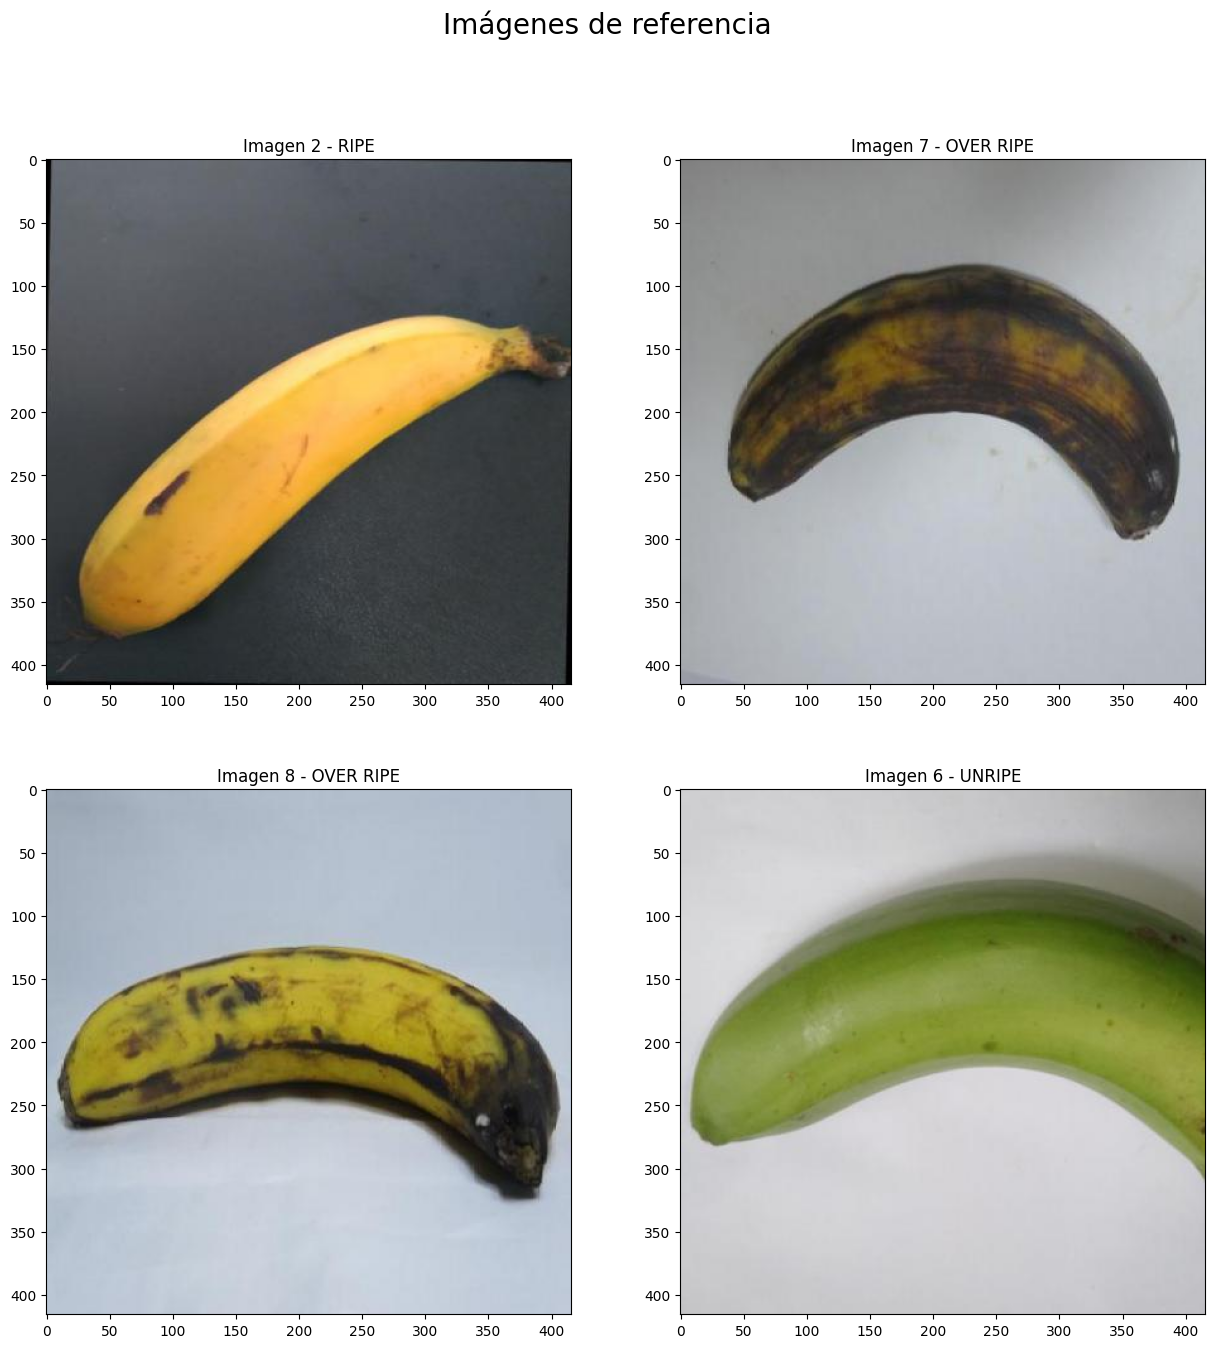

In [16]:
#Se muestran las imágenes seleccionadas
fig1, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
fig1.suptitle('Imágenes de referencia', fontsize=20)

arreglo_plots[0,0].set_title('Imagen 2 - RIPE')
arreglo_plots[0,0].imshow(img2)
arreglo_plots[0,1].set_title('Imagen 7 - OVER RIPE')
arreglo_plots[0,1].imshow(img7)
arreglo_plots[1,0].set_title('Imagen 8 - OVER RIPE')
arreglo_plots[1,0].imshow(img8)
arreglo_plots[1,1].set_title('Imagen 6 - UNRIPE')
arreglo_plots[1,1].imshow(img6)

A continuación haremos dos versiones de collage de las imagenes, es decir una imgaen que contenga los tres tipos de banananos para poder observar y analizar los canales de color en los que se diferencian entre sí.


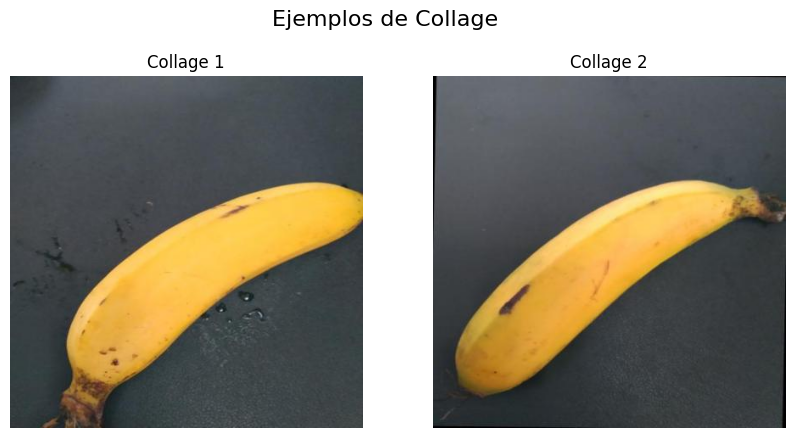

In [17]:
collage1 = cv2.cvtColor(cv2.imread("img/collage1.png"), cv2.COLOR_BGR2RGB)
collage2 = cv2.cvtColor(cv2.imread("img/collage2.png"), cv2.COLOR_BGR2RGB)
    
# Crear la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Ejemplos de Collage", fontsize=16)
    
# Mostrar imágenes
axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("Collage 1")
    
axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("Collage 2")
    
# Mostrar la figura
plt.show()

Analizaremos los diferentes canales de color

In [18]:

def visualizar_canales(imagen_path):
    imgp = cv2.cvtColor(cv2.imread(imagen_path), cv2.COLOR_BGR2RGB)
    
    # RGB
    imgp_R, imgp_G, imgp_B = imgp[:,:,0], imgp[:,:,1], imgp[:,:,2]
    
    # CMY
    imgp_C = 255 - imgp_R
    imgp_M = 255 - imgp_G
    imgp_Y = 255 - imgp_B
    
    # YIQ
    imgp_Y1 = 0.299*imgp_R + 0.587*imgp_G + 0.114*imgp_B
    imgp_I = 0.596*imgp_R - 0.274*imgp_G - 0.322*imgp_B
    imgp_Q = 0.211*imgp_R - 0.523*imgp_G + 0.312*imgp_B
    
    # HSV
    imgp_HSV = cv2.cvtColor(imgp, cv2.COLOR_RGB2HSV)
    imgp_H, imgp_S, imgp_V = imgp_HSV[:,:,0], imgp_HSV[:,:,1], imgp_HSV[:,:,2]
    
    # LAB
    imgp_LAB = cv2.cvtColor(imgp, cv2.COLOR_RGB2LAB)
    imgp_L, imgp_A, imgp_B1 = imgp_LAB[:,:,0], imgp_LAB[:,:,1], imgp_LAB[:,:,2]
    
    # Visualización
    fig, arreglo = plt.subplots(5, 3, figsize=(25, 25))
    fig.suptitle('Canales de colores - imgp', fontsize=20)
    
    # RGB
    arreglo[0,0].set_title('Canal R del RGB')
    arreglo[0,0].imshow(imgp_R, cmap='Reds', aspect='auto')
    arreglo[0,1].set_title('Canal G del RGB')
    arreglo[0,1].imshow(imgp_G, cmap='Greens', aspect='auto')
    arreglo[0,2].set_title('Canal B del RGB')
    arreglo[0,2].imshow(imgp_B, cmap='Blues', aspect='auto')
    
    # CMY
    arreglo[1,0].set_title('Canal C del CMY')
    arreglo[1,0].imshow(imgp_C, cmap='GnBu', aspect='auto')
    arreglo[1,1].set_title('Canal M del CMY')
    arreglo[1,1].imshow(imgp_M, cmap='RdPu', aspect='auto')
    arreglo[1,2].set_title('Canal Y del CMY')
    arreglo[1,2].imshow(imgp_Y, cmap='YlOrBr', aspect='auto')
    
    # YIQ
    arreglo[2,0].set_title('Canal Y del YIQ')
    arreglo[2,0].imshow(imgp_Y1, cmap='gray', aspect='auto')
    arreglo[2,1].set_title('Canal I del YIQ')
    arreglo[2,1].imshow(imgp_I, cmap='gray', aspect='auto')
    arreglo[2,2].set_title('Canal Q del YIQ')
    arreglo[2,2].imshow(imgp_Q, cmap='gray', aspect='auto')
    
    # HSV
    arreglo[3,0].set_title('Canal H del HSV')
    arreglo[3,0].imshow(imgp_H, cmap='gray', aspect='auto')
    arreglo[3,1].set_title('Canal S del HSV')
    arreglo[3,1].imshow(imgp_S, cmap='gray', aspect='auto')
    arreglo[3,2].set_title('Canal V del HSV')
    arreglo[3,2].imshow(imgp_V, cmap='gray', aspect='auto')
    
    # LAB
    arreglo[4,0].set_title('Canal L del LAB')
    arreglo[4,0].imshow(imgp_L, aspect='auto')
    arreglo[4,1].set_title('Canal A del LAB')
    arreglo[4,1].imshow(imgp_A, aspect='auto')
    arreglo[4,2].set_title('Canal B del LAB')
    arreglo[4,2].imshow(imgp_B1, aspect='auto')
    
    plt.show()




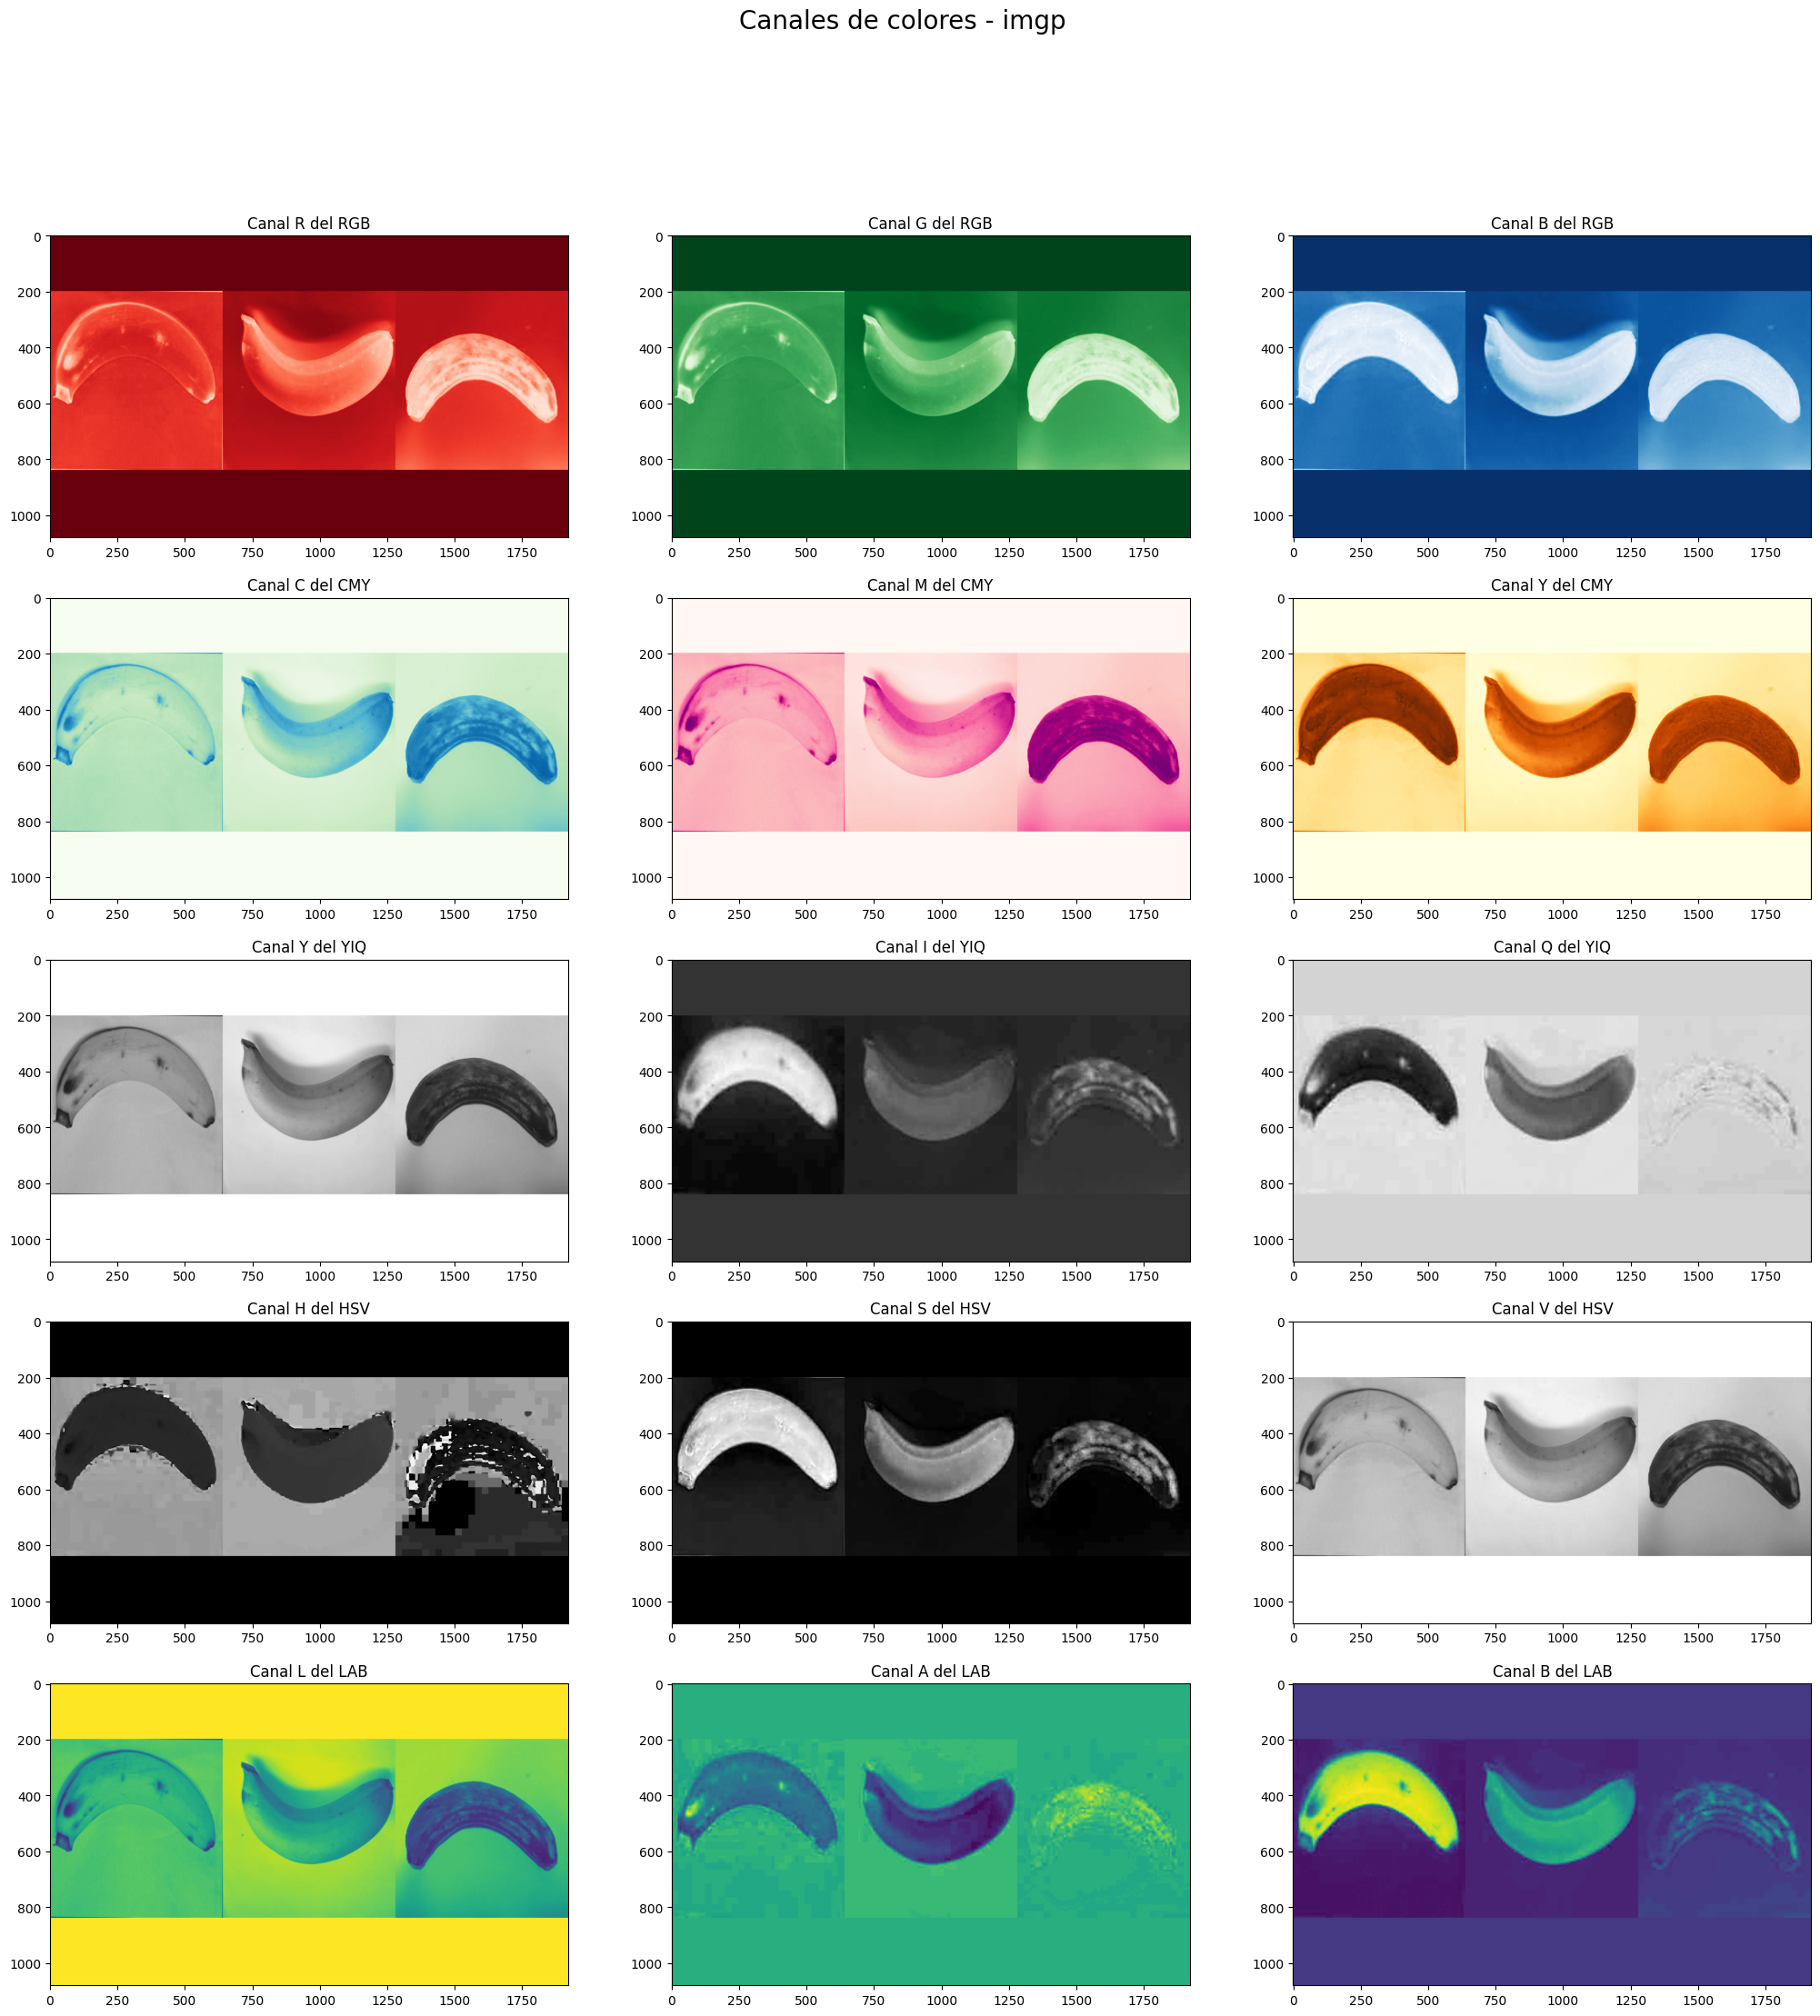

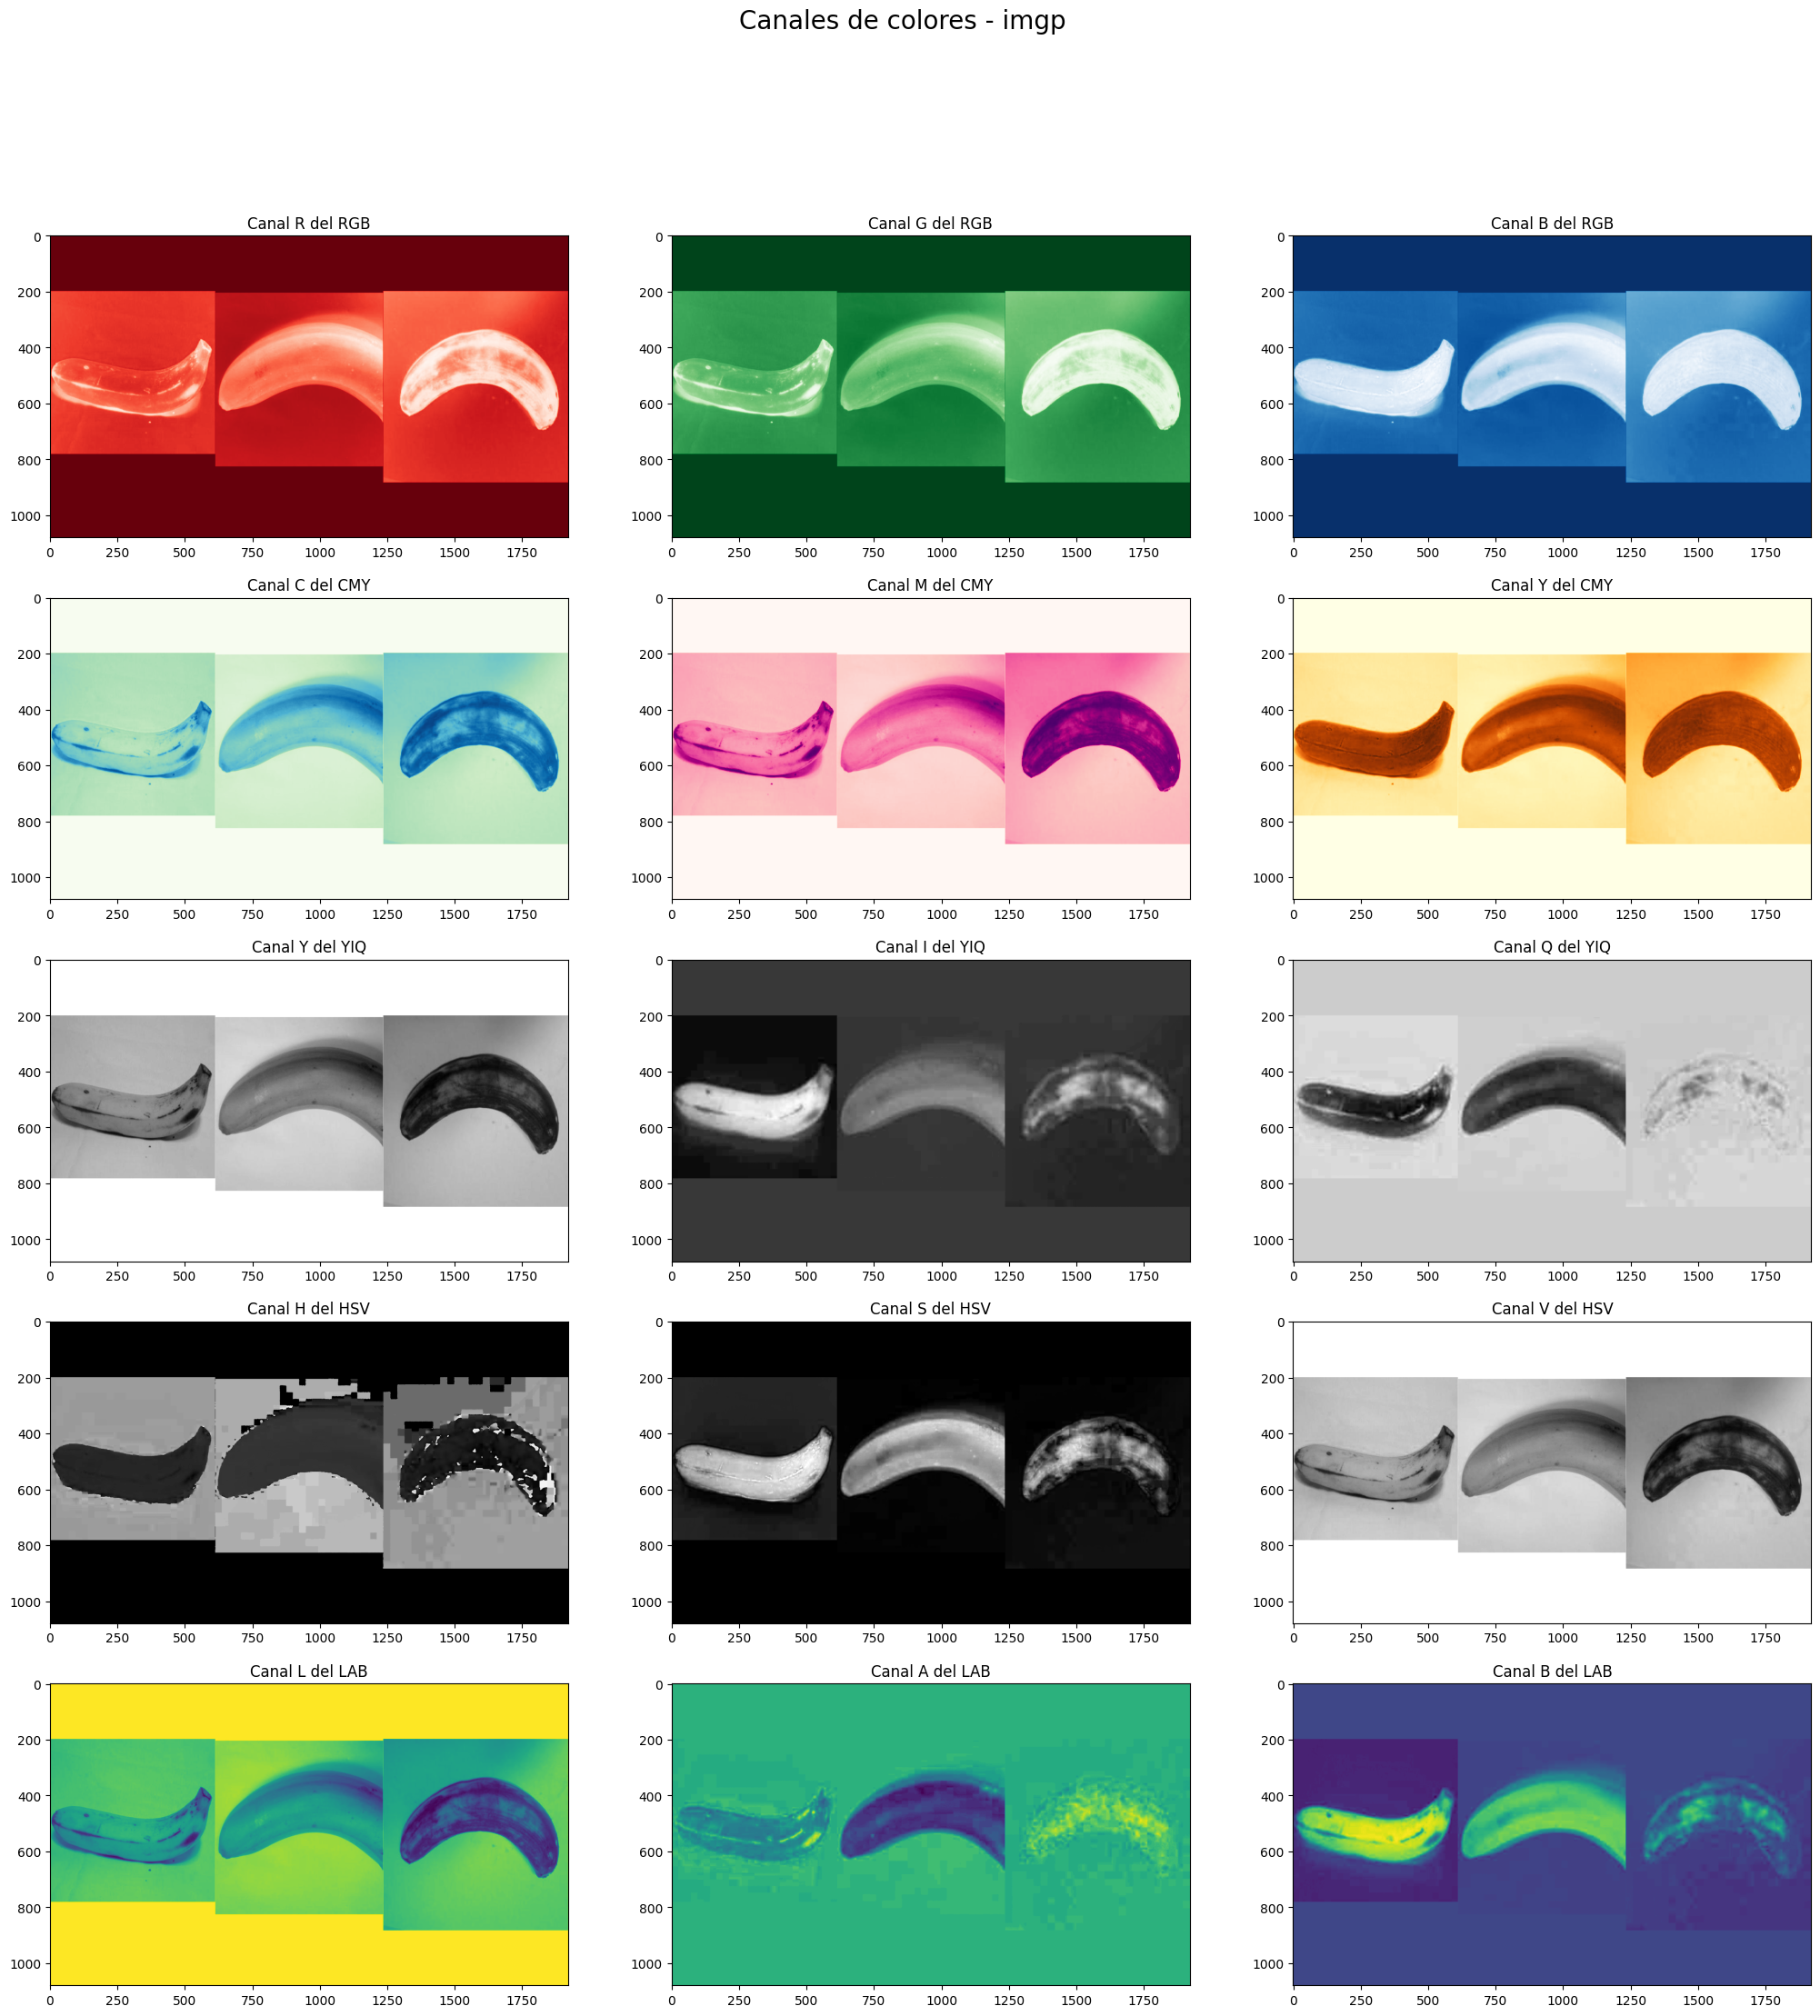

In [19]:
# Uso de la función
visualizar_canales("img/collage1.png")
visualizar_canales("img/collage2.png")

Para analizar los bananos ripe comparando en las dos imagenes segun sus canales de color nos damos cuenta de que nos sirve el canal B de LAB, el canal y el I del YIQ, a continuación vamos a analizar sus respectivos histogramas

Text(0.5, 1.0, 'I DE YIQ')

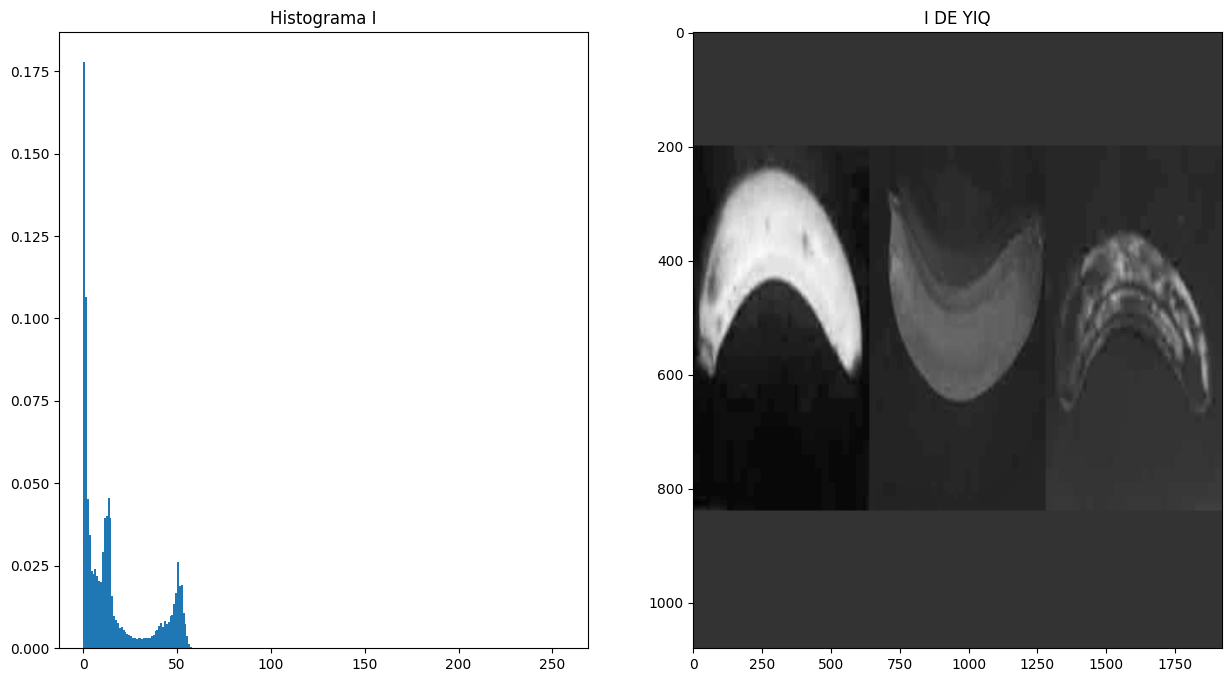

In [20]:
# Interesado en hacer histograma de 3 canales de color:I (YIQ) 
#hacemos un subplot 2x2, en cada fila la imagen con el canala que queremos analizar y al lado su respectivo histograma
imgp = cv2.cvtColor(cv2.imread("img/collage1.png"), cv2.COLOR_BGR2RGB)

# RGB
imgp_R, imgp_G, imgp_B = imgp[:,:,0], imgp[:,:,1], imgp[:,:,2]
    
# YIQ
imgp_I = 0.596*imgp_R - 0.274*imgp_G - 0.322*imgp_B

fig, axs = plt.subplots(1, 2, figsize=(15, 8))


# I
axs[0].hist(imgp_I.ravel(), bins=256, range=[0, 256], density=True)
axs[0].set_title('Histograma I')
axs[1].imshow(imgp_I, cmap='gray', aspect='auto')
axs[1].set_title('I DE YIQ')

Analizando los histogramas nos damos cuenta que el más facil es canal B del LAB

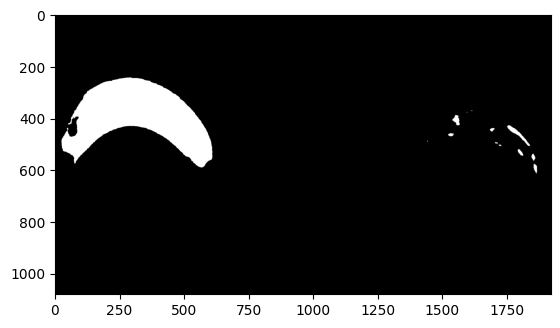

In [21]:
#Vamos a hacer umbralización con la imagen escogiendo el canal I DE YIQ
#hacemos una copia de la imagen original
tresh = collage1.copy()
tresh[imgp_I>27]=255 #pone en blanco la mayoría de las partes del banado
tresh[imgp_I<27]=0
#tresh[img2_HSV<55]=0 #pone el fondo
tresh= cv2.cvtColor(tresh, cv2.COLOR_RGB2GRAY)
ret, tresh = cv2.threshold(tresh, 20, 255, cv2.THRESH_BINARY)#usamos funciones para aplicar el treshold
plt.imshow(tresh, cmap="gray")

C:\Users\Trejo\AppData\Local\Temp\ipykernel_28064\653822582.py:4: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  tresh_morph = morph.remove_small_holes(tresh_morph, 500) #elimina agujeros pequeños dentro de los objetos


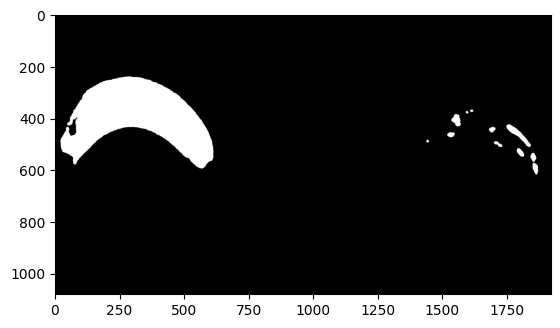

In [22]:
#Ahora vamos a hacer uso de las operaciones morfologicas, para perfeccionar los huecos del caballo y el fondo
tresh_morph = tresh.copy()
tresh_morph = morph.remove_small_objects(tresh_morph, 8000) #elimina objetos pequeños blancos de la imagen
tresh_morph = morph.remove_small_holes(tresh_morph, 500) #elimina agujeros pequeños dentro de los objetos
tresh_morph = morph.binary_dilation((tresh_morph), morph.disk(4)) #expande regiones blancas, rellena huecos




plt.imshow(tresh_morph, cmap='gray')

vamos a visualizar el resultado de la segmentación


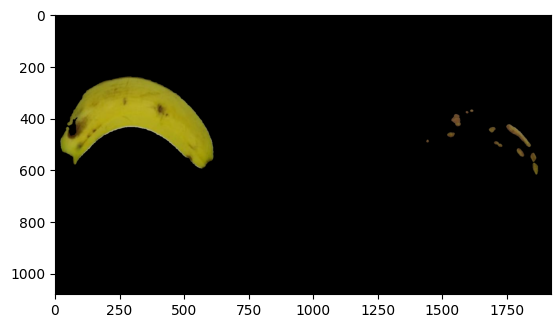

In [23]:
#vamos a multiplicar la mascara para poder visualizar el resultado de la segmentación
mascara = tresh_morph.copy().astype(np.uint8) #volver a lista numerica pq los limites del histograma botaban una lista booleana
mascara[mascara > 0] = 1 #normalizar la mascara, todos los valores mayores a 0 dan 1

ripe_segmentado = collage1.copy() #copia de la original a color
for i in range(3): #aplicar mascara a cada canal de color
    ripe_segmentado[:, :, i] = ripe_segmentado[:, :, i] * mascara
    

plt.imshow(ripe_segmentado)

Ahora vamos a contornear la detección del banano ripe

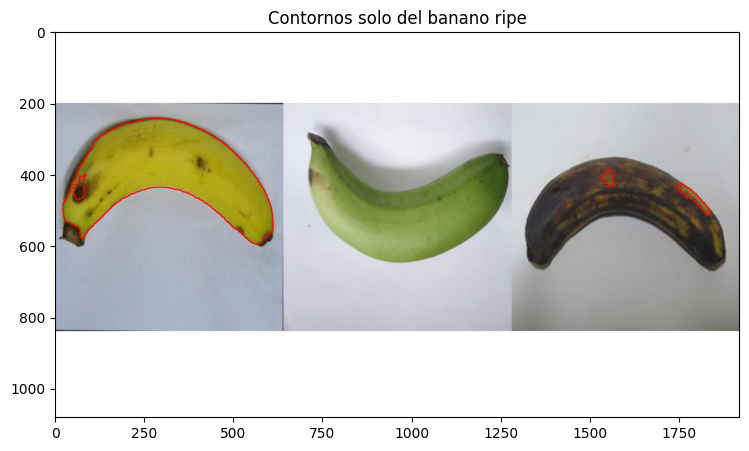

In [24]:
# 🔹 Detectar contornos
tresh_morph = (tresh_morph * 255).astype(np.uint8)

contornos, _ = cv2.findContours(tresh_morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos por área (ajusta el umbral si es necesario)
bananos_ripe = [cnt for cnt in contornos if cv2.contourArea(cnt) > 1000]

# Dibujar contornos en la imagen original (que ya está en RGB)
img_contornos = collage1.copy()
cv2.drawContours(img_contornos, bananos_ripe, -1, (255, 0, 0), 2)  # Color en formato RGB (rojo)

# Mostrar la imagen con los contornos (asegurando que sigue en RGB)
plt.figure(figsize=(10, 5))
plt.imshow(img_contornos) 
plt.title('Contornos solo del banano ripe')
plt.show()


reunimos todo eset proceso en una funcion

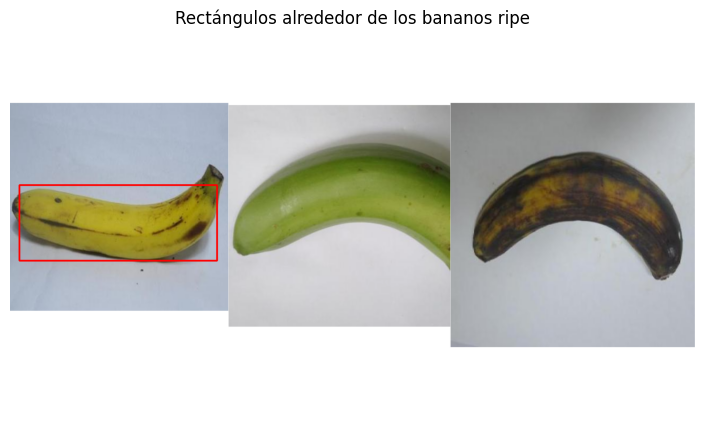

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology as morph

def segmentar_bananos_ripe(img): 
    """
    Segmenta los bananos en una imagen usando el canal I de YIQ y dibuja un rectángulo rojo
    alrededor de los que sean ripe (80% o más del área es amarilla).
    
    Parámetros:
    img (numpy.ndarray): Imagen de entrada en formato RGB.

    Retorna:
    numpy.ndarray: Imagen con los rectángulos rojos alrededor de los bananos ripe.
    """
    # Convertir imagen a float si es necesario
    if img.max() > 1.0:
        img = img.astype(np.float32) / 255.0

    # Separar canales de la imagen
    img_R, img_G, img_B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    # Convertir a canal I de YIQ
    img_I = 0.596 * img_R - 0.274 * img_G - 0.322 * img_B

    # Umbralización con el canal I
    tresh = np.zeros_like(img)
    tresh[img_I > 0.105] = 1  # Ajusta este umbral según sea necesario
    tresh[img_I <= 0.105] = 0

    # Convertir a escala de grises y binarizar
    tresh = cv2.cvtColor((tresh * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    _, tresh = cv2.threshold(tresh, 20, 255, cv2.THRESH_BINARY)

    # Operaciones morfológicas para mejorar la segmentación
    tresh_morph = morph.remove_small_objects(tresh.astype(bool), 8000)  # Quitar objetos pequeños
    tresh_morph = morph.remove_small_holes(tresh_morph, 500)  # Rellenar huecos pequeños
    tresh_morph = morph.binary_dilation(tresh_morph, morph.disk(4))  # Expandir las regiones blancas

    # Convertir a uint8 para `cv2.findContours`
    tresh_morph = (tresh_morph * 255).astype(np.uint8)

    # Detectar contornos
    contornos, _ = cv2.findContours(tresh_morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar rectángulos en la imagen original
    img_rectangles = (img * 255).astype(np.uint8)
    
    for cnt in contornos:
        area_total = cv2.contourArea(cnt)
        if area_total > 1000:  # Filtro por tamaño mínimo
            # Crear máscara del contorno
            mask = np.zeros_like(img_I, dtype=np.uint8)
            cv2.drawContours(mask, [cnt], -1, 255, thickness=cv2.FILLED)

            # Contar píxeles ripe dentro del contorno
            ripe_pixels = np.sum((img_I > 0.105) & (mask == 255))
            porcentaje_ripe = ripe_pixels / area_total

            # Si más del 80% del área del contorno es ripe, se dibuja un rectángulo
            if porcentaje_ripe > 0.8:
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(img_rectangles, (x, y), (x + w, y + h), (255, 0, 0), 3)  # Rojo

    # Mostrar la imagen resultante
    plt.figure(figsize=(10, 5))
    plt.imshow(img_rectangles)
    plt.title('Rectángulos alrededor de los bananos ripe')
    plt.axis("off")
    plt.show()

    return img_rectangles

# Cargar imagen y probar
imgp = cv2.cvtColor(cv2.imread("img/collage2.png"), cv2.COLOR_BGR2RGB)
resultado = segmentar_bananos_ripe(imgp)

prueba

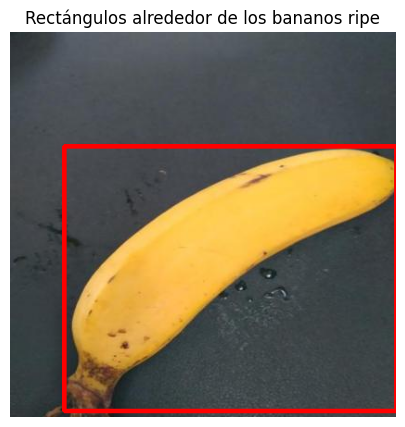

In [4]:
img = cv2.cvtColor(cv2.imread("img/banana-ad7d5ed0-394a.jpg"), cv2.COLOR_BGR2RGB)
resultado = segmentar_bananos_ripe(img)

## Resultados analisis de canales de colores para la clase over ripe

A continuación analizamos los mejores canales de colores para las bananas over ripe (imagen 7 y 8):

**Canal HSV:**<br>
-El canal más útil es el V.<br>
-Se puede observar un resalte notable en las manchas marrones que presenta el banano cuando está en su estado súper maduro.<br>

**Canal LAB:**<br>
-El canal más útil es el B.<br>
-Se puede observar un resalte notable para detectar la pérdida de color amarillo.<br>

**Canal YIQ**<br>
-El único canal útil es el Y, los demás distorsionan la imagen.<br>
-El canal Y permite ver las manchas del banano con claridad, ademas de un buen contraste con el fondo.<br>

A continuación vamos a analizar los histogramas de los canales de interes para los bananos en su estado over ripe. El canal V de HSV, B de LAB y Y de YIQ

Text(0.5, 1.0, 'Y DE YIQ')

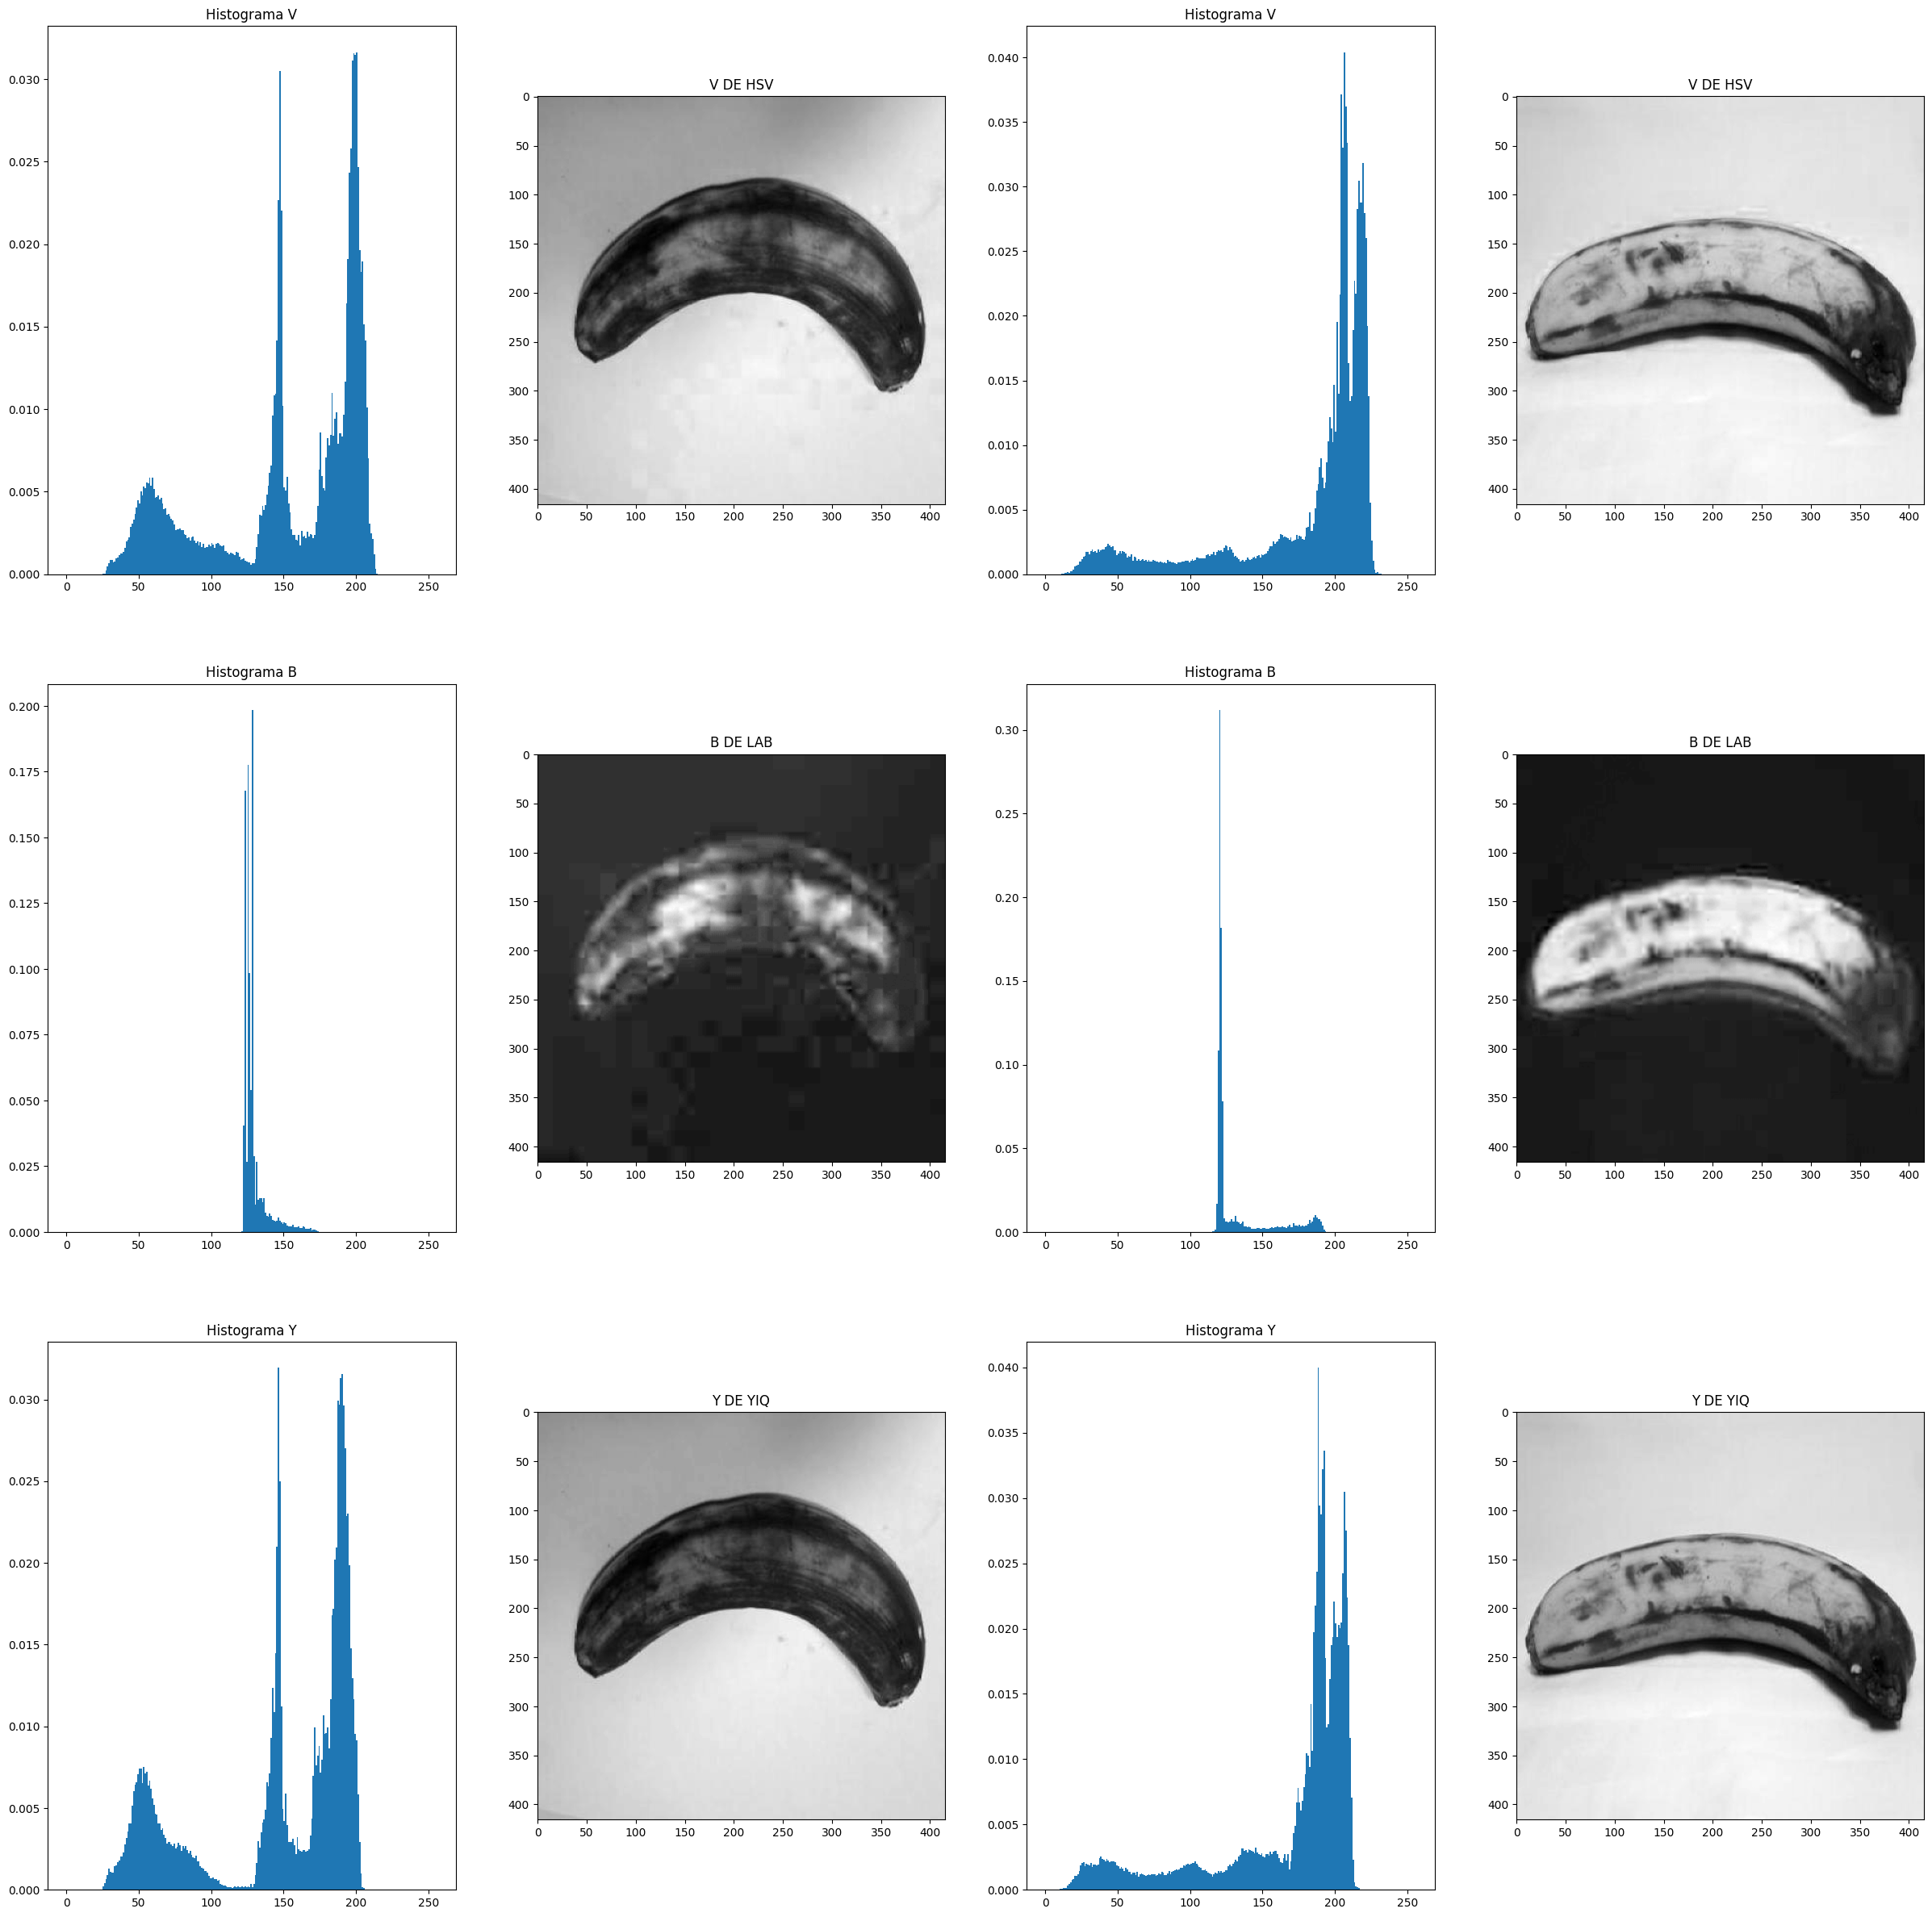

In [27]:
# Interesado en hacer histograma de 3 canales de color: V de HSV, B de LAB y Y de YIQ
img7_R = img7[:,:,0]
img7_G = img7[:,:,1]
img7_B = img7[:,:,2]

img8_R = img8[:,:,0]
img8_G = img8[:,:,1]
img8_B = img8[:,:,2]

img7_HSV = cv2.cvtColor(img7, cv2.COLOR_RGB2HSV)
img7_LAB = cv2.cvtColor(img7, cv2.COLOR_RGB2LAB)
img8_HSV = cv2.cvtColor(img8, cv2.COLOR_RGB2HSV)
img8_LAB = cv2.cvtColor(img8, cv2.COLOR_RGB2LAB)

#YIQ
img7_Y1 = 0.299*img7_R + 0.587*img7_G + 0.114*img7_B
img7_I = 0.596*img7_R - 0.274*img7_G - 0.322*img7_B
img7_Q = 0.211*img7_R - 0.523*img7_G + 0.312*img7_B

img8_Y1 = 0.299*img8_R + 0.587*img8_G + 0.114*img8_B
img8_I = 0.596*img8_R - 0.274*img8_G - 0.322*img8_B
img8_Q = 0.211*img8_R - 0.523*img8_G + 0.312*img8_B

#hacemos un subplot 3x2, en cada fila la imagen con el canal que queremos analizar y al lado su respectivo histograma
fig, axs = plt.subplots(3, 4, figsize=(30, 30))

# V de HSV para la imagen 7
axs[0, 0].hist(img7_HSV[:, :, 2].ravel(), bins=256, range=[0, 256], density=True)
axs[0, 0].set_title('Histograma V')
axs[0, 1].imshow(img7_HSV[:, :, 2], cmap='gray')
axs[0, 1].set_title('V DE HSV')

# B de LAB para la imagen 7
axs[1, 0].hist(img7_LAB[:, :, 2].ravel(), bins=256, range=[0, 256], density=True)
axs[1, 0].set_title('Histograma B')
axs[1, 1].imshow(img7_LAB[:, :, 2], cmap='gray')
axs[1, 1].set_title('B DE LAB')

# Y de YIQ para la imagen 7
axs[2, 0].hist(img7_Y1.ravel(), bins=256, range=[0, 256], density=True)
axs[2, 0].set_title('Histograma Y')
axs[2, 1].imshow(img7_Y1, cmap='gray')
axs[2, 1].set_title('Y DE YIQ')

# V de HSV para la imagen 8
axs[0, 2].hist(img8_HSV[:, :, 2].ravel(), bins=256, range=[0, 256], density=True)
axs[0, 2].set_title('Histograma V')
axs[0, 3].imshow(img8_HSV[:, :, 2], cmap='gray')
axs[0, 3].set_title('V DE HSV')

# B de LAB para la imagen 8
axs[1, 2].hist(img8_LAB[:, :, 2].ravel(), bins=256, range=[0, 256], density=True)
axs[1, 2].set_title('Histograma B')
axs[1, 3].imshow(img8_LAB[:, :, 2], cmap='gray')
axs[1, 3].set_title('B DE LAB')

# Y de YIQ para la imagen 8
axs[2, 2].hist(img8_Y1.ravel(), bins=256, range=[0, 256], density=True)
axs[2, 2].set_title('Histograma Y')
axs[2, 3].imshow(img8_Y1, cmap='gray')
axs[2, 3].set_title('Y DE YIQ')


## Resultados del análisis de histogramas
* Las imágenes como la iamgen 7, en la que el banano ya se encuentra casi en su totalidad marrón, tienen un comportamiento óptimo para una segmentación por el método OTSU, esto es porque presenta 2 picos claramente definidos.
* En la iamgen 8, a pesar de no tener tantas manchas marrones que cubran en su totalidad el banano, se logran observar también dos picos definidos.
* El comportamiento en el canal V evidencia una mejor separación de ambos picos, que nos ayudará con la segmentación.

# Intento de segmentación

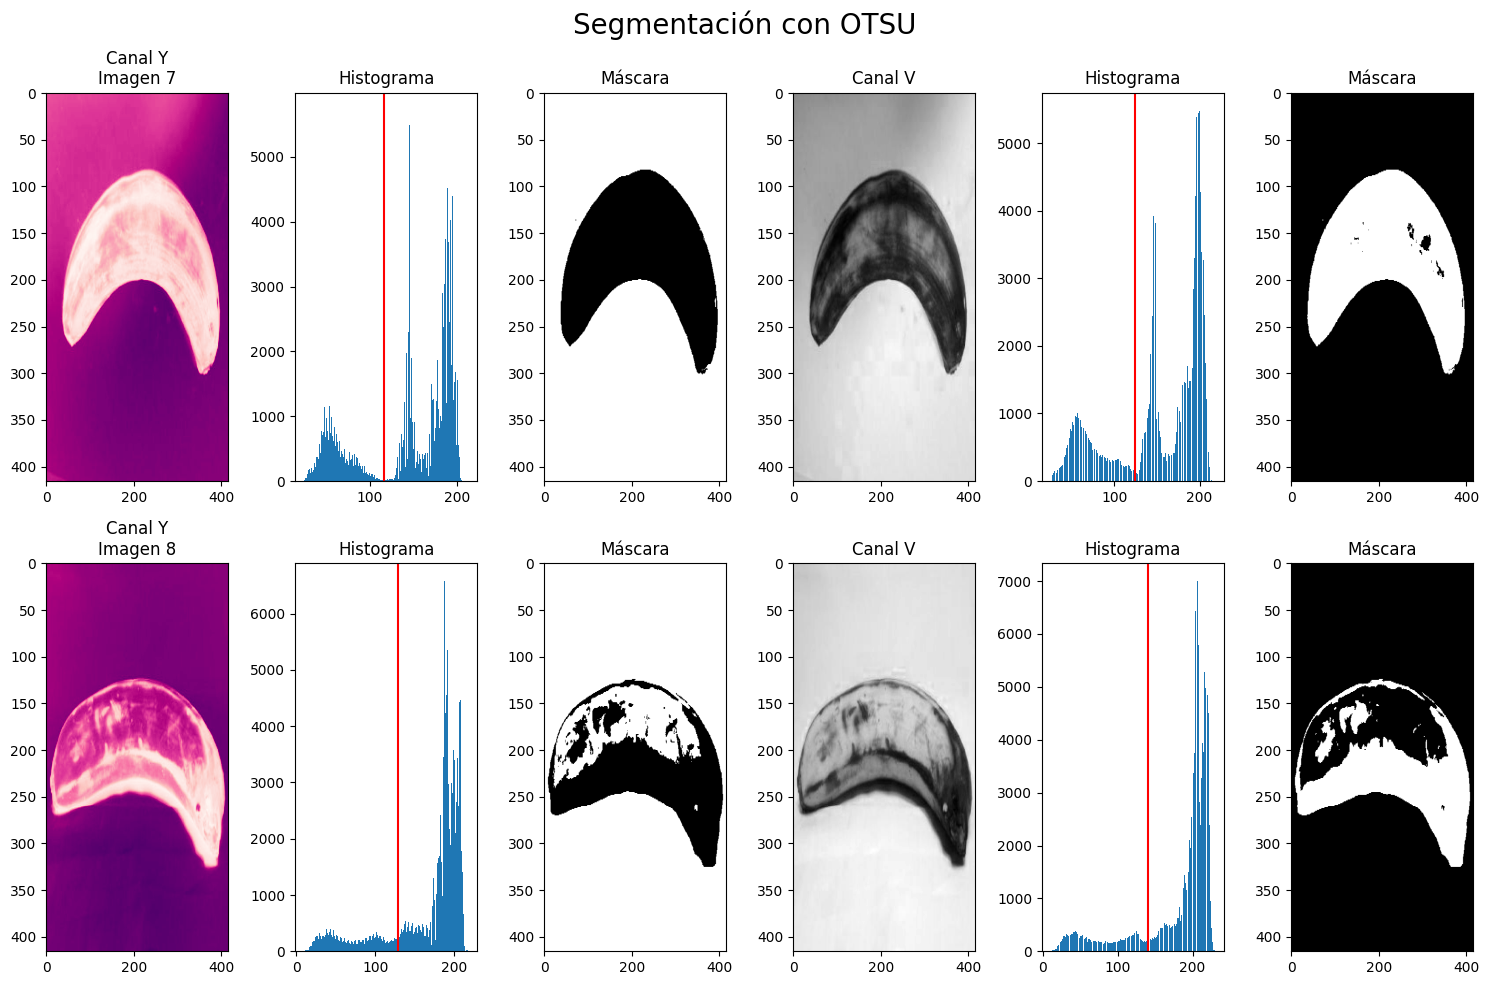

In [28]:
#Se calcula para los canales seleccionados, el threshold con OTSU y la máscara correspondiente, con la función .threshold
#Se quiere que llas manchas del banano sea lo que quede blanco en la segmentación, por lo tanto, para el canal Y se usa .THRESH_BINARY, mientras que pare el V se usa .THRESH_BINARY_INV

thresh_img7V_otsu, mask_img7V_otsu = cv2.threshold(img7_HSV[:, :, 2], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
thresh_img7Y_otsu, mask_img7Y_otsu = cv2.threshold(img7_Y1.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh_img8V_otsu, mask_img8V_otsu = cv2.threshold(img8_HSV[:, :, 2], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
thresh_img8Y_otsu, mask_img8Y_otsu = cv2.threshold(img8_Y1.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

"""
#Como puedo aumentaar el valor del threshold para que se segmente mejor la mancha del banano?
thresh_img7Y_otsu = thresh_img7Y_otsu - 50
thresh_img8Y_otsu = thresh_img8Y_otsu - 50

#Ahora aplicar este nuevo threshold a las imágenes
_, mask_img7Y_otsu = cv2.threshold(img7_Y1.astype(np.uint8), thresh_img7Y_otsu, 255, cv2.THRESH_BINARY)
_, mask_img8Y_otsu = cv2.threshold(img8_Y1.astype(np.uint8), thresh_img8Y_otsu, 255, cv2.THRESH_BINARY)
"""

#Se crea un arreglo 2 x 2 para mostrar las imágenes
otsu_fig, arreglo_plots = plt.subplots(2,6, figsize=(15, 10))
otsu_fig.suptitle('Segmentación con OTSU', fontsize=20)

arreglo_plots[0,0].set_title('Canal Y\nImagen 7')
arreglo_plots[0,0].imshow(img7_Y1, cmap='RdPu', aspect='auto')
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img7_Y1.ravel(), 256)
arreglo_plots[0,1].axvline(x=thresh_img7Y_otsu, color='red')
arreglo_plots[0,2].set_title('Máscara')
arreglo_plots[0,2].imshow(mask_img7Y_otsu, cmap='gray', aspect='auto')
arreglo_plots[0,3].set_title('Canal V')
arreglo_plots[0,3].imshow(img7_HSV[:, :, 2], cmap='gray', aspect='auto')
arreglo_plots[0,4].set_title('Histograma')
arreglo_plots[0,4].hist(img7_HSV[:, :, 2].ravel(), 256)
arreglo_plots[0,4].axvline(x=thresh_img7V_otsu, color='red')
arreglo_plots[0,5].set_title('Máscara')
arreglo_plots[0,5].imshow(mask_img7V_otsu, cmap='gray', aspect='auto')

arreglo_plots[1,0].set_title('Canal Y\nImagen 8')
arreglo_plots[1,0].imshow(img8_Y1, cmap='RdPu', aspect='auto')
arreglo_plots[1,1].set_title('Histograma')
arreglo_plots[1,1].hist(img8_Y1.ravel(), 256)
arreglo_plots[1,1].axvline(x=thresh_img8Y_otsu, color='red')
arreglo_plots[1,2].set_title('Máscara')
arreglo_plots[1,2].imshow(mask_img8Y_otsu, cmap='gray', aspect='auto')
arreglo_plots[1,3].set_title('Canal V')
arreglo_plots[1,3].imshow(img8_HSV[:, :, 2], cmap='gray', aspect='auto')
arreglo_plots[1,4].set_title('Histograma')
arreglo_plots[1,4].hist(img8_HSV[:, :, 2].ravel(), 256)
arreglo_plots[1,4].axvline(x=thresh_img8V_otsu, color='red')
arreglo_plots[1,5].set_title('Máscara')
arreglo_plots[1,5].imshow(mask_img8V_otsu, cmap='gray', aspect='auto')

plt.tight_layout()  # Ajustar el espacio entre plots
plt.show()

### Resultados segmentación por OTSU
* Como se esperaba, la imagen 7 donde la madurez (over ripe) del banano es bastante evidente, presentan una segmentación óptima; mientras que para la iamgen 8, donde el histograma tiene varios picos, tienen zonas que no corresponden a la parte super madura del banano. Es necesario un preprocesamiento para mejorar los resultado.
* Como se ve en las imágenes el canal V tiene resultados ligeramente mejores, las zonas mal detectadas, que no corresponden a la grieta, son de menor tamaño.

## Mejora de calidad de la máscara
Se deben eliminar las zonas de la máscara que no pertenecen a las partes marrones del banano, varias de estas son simples lineas o marcas pequeñas del banano. Podemos lograr esto haciendo uso de operaciones morfologicas

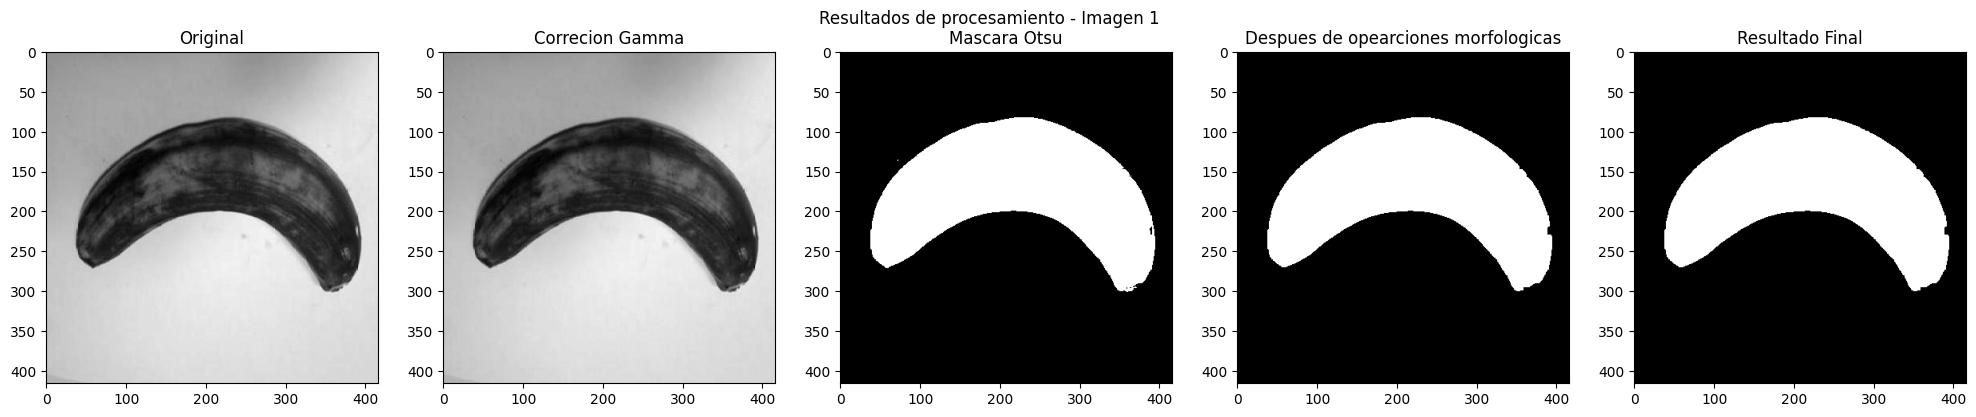

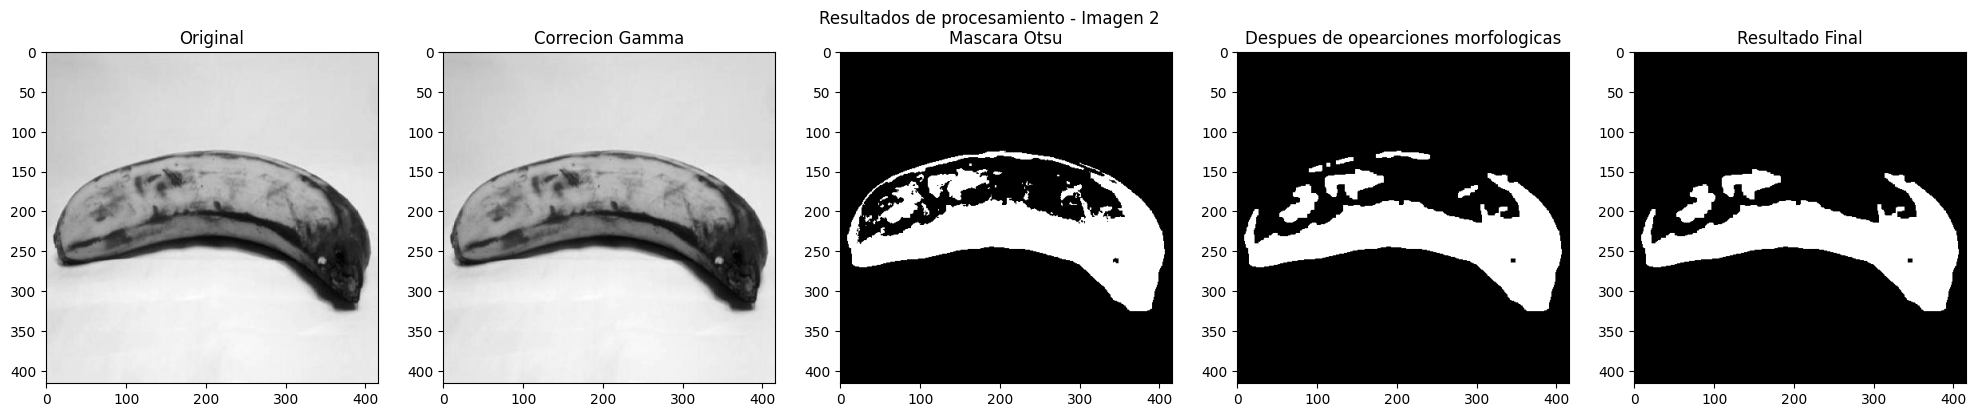

In [ ]:
def CLAHE_GAMMA_EC_OTSU(im):
    # Umbral de Otsu con parámetros ajustados
    _, mask_otsu = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Operaciones morfologicas
    kernel = np.ones((5,5), np.uint8)

    #  Apertura para eliminar ruido pequeño
    mask_opening = cv2.morphologyEx(mask_otsu, cv2.MORPH_OPEN, kernel)
    
    # Se aplica un closing para rellenar los huecos
    mask_closing = cv2.morphologyEx(mask_opening, cv2.MORPH_CLOSE, kernel)
    
    # Se eliminan las regiones con un area menor a 1000 pixeles
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask_closing, connectivity=8)
    min_area = 1000  
    max_area = 50000  

    # Intensidad del treshold adicional para enfocarse en los puntos oscuros
    intensity_threshold = np.mean(im) * 0.7  
    
    mask_filtered = np.zeros_like(mask_closing)
    for i in range(1, num_labels):
        if min_area < stats[i, cv2.CC_STAT_AREA] < max_area:
            component_mask = (labels == i)
            mean_intensity = np.mean(im[component_mask])
            if mean_intensity < intensity_threshold:
                mask_filtered[component_mask] = 255

    return im, mask_otsu, mask_opening, mask_closing, mask_filtered

#Se convierten las imágenes a uint8 para poder aplicar las funciones de OpenCV
img7_Y1_unit8 = img7_Y1.astype(np.uint8)
img8_Y1_unit8 = img8_Y1.astype(np.uint8)

# Se aplica a las imágenes
imgs_Y = [img7_Y1_unit8, img8_Y1_unit8]

masks_fin = []
masks_otsu = []
# Procesar y mostrar resultados
for i, img in enumerate(imgs_Y):
    img_gamma, mask_otsu, mask_open, mask_close, mask_final = CLAHE_GAMMA_EC_OTSU(img)
    masks_fin.append(mask_final)
    masks_otsu.append(mask_otsu)

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle(f'Resultados de procesamiento - Imagen {i+1}')
    
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original')
    axes[1].imshow(img_gamma, cmap='gray')
    axes[1].set_title('Correcion Gamma')
    axes[2].imshow(mask_otsu, cmap='gray')
    axes[2].set_title('Mascara Otsu')
    axes[3].imshow(mask_close, cmap='gray')
    axes[3].set_title('Despues de opearciones morfologicas')
    axes[4].imshow(mask_final, cmap='gray')
    axes[4].set_title('Resultado Final')
    
    plt.tight_layout()
    plt.show()


Observamos una considerable mejora en la mascara otsu original a la nueva mascara luego de aplicarle las operaciones morfologicas de apertura y cierre. Por lo que ya podemos pasar a aplicar los contornos en las imagenes usando las mascaras.

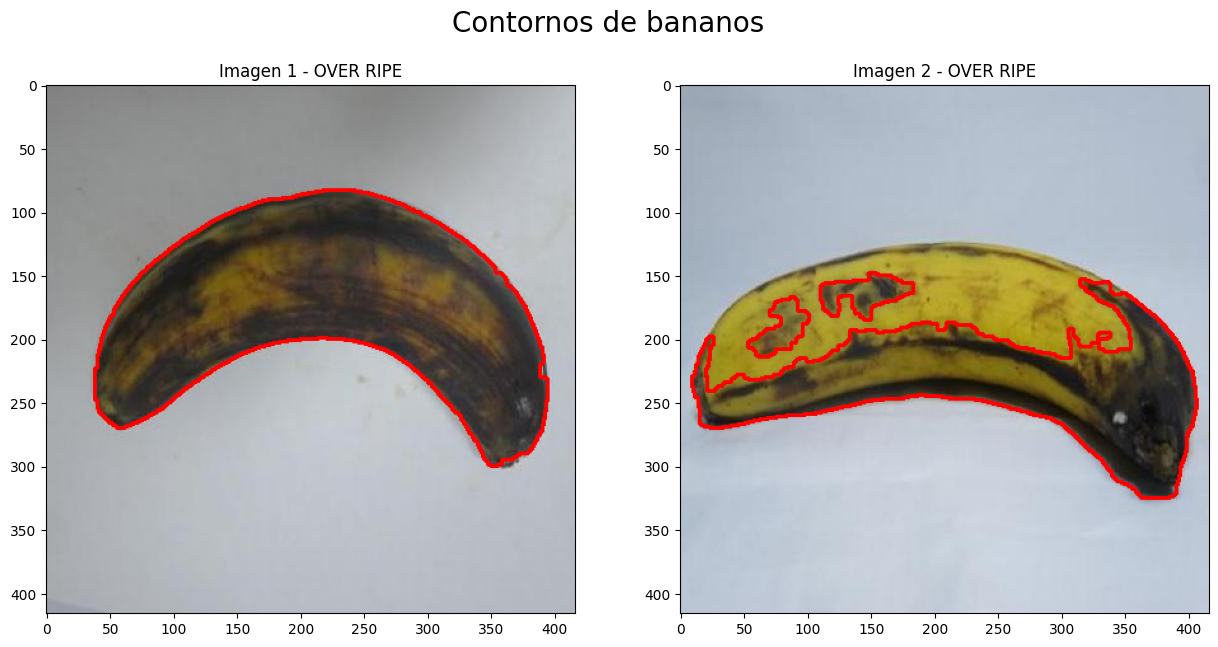

In [42]:
#Imágenes RGB originales
imgs_RGB = [img7.copy(), img8.copy(), img2.copy(), img6.copy()]

# Lista para almacenar las imágenes con contornos
imgs_contorno = []

# Ciclo para detectar y dibujar los contornos en las imágenes RGB
for i in range(len(masks_fin)):
    RGB_copy = imgs_RGB[i].copy()
    
    # Detectar contornos en la máscara
    contornos, _ = cv2.findContours(masks_fin[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filtrar contornos por área (para eliminar pequeñas áreas de ruido)
    contornos_filtrados = [cnt for cnt in contornos if cv2.contourArea(cnt) > 1000]
    
    # Dibujar solo los contornos sin cajas
    cv2.drawContours(RGB_copy, contornos_filtrados, -1, (255, 0, 0), 2)
    
    imgs_contorno.append(RGB_copy)

# Se muestran las imágenes con los contornos
bboxed_fig, bboxed_arreglo = plt.subplots(1, 2, figsize=(15, 7))
bboxed_fig.suptitle('Contornos de bananos', fontsize=20)

bboxed_arreglo[0].set_title('Imagen 1 - OVER RIPE')
bboxed_arreglo[0].imshow(imgs_contorno[0])
bboxed_arreglo[1].set_title('Imagen 2 - OVER RIPE')
bboxed_arreglo[1].imshow(imgs_contorno[1])


Finalmente para el tipo de banano en estado over ripe, observamos que se obtiene un buen resultado para seleccionar las manchas marrones que indican que el banano ya se encuentra en este estado. Sin embargo, ciertas manchas del banano se toman en cuenta cuando no son muy notorias, esto debido a la mascara aplicada.